Saving cv-19.csv to cv-19 (7).csv
Claves disponibles: dict_keys(['cv-19 (7).csv'])
Nombre del archivo: cv-19 (7).csv


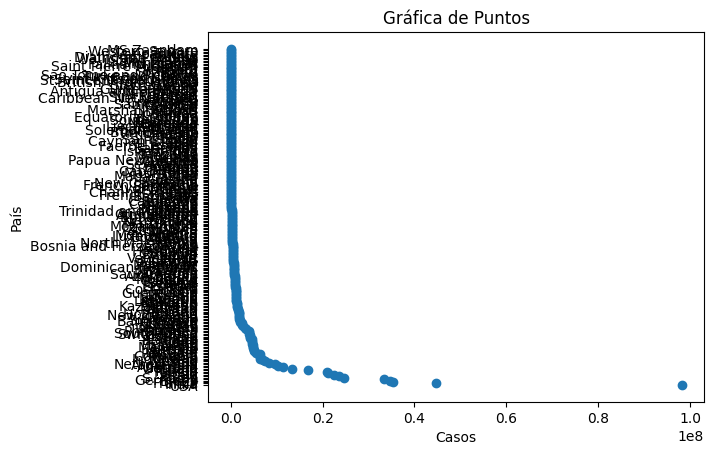

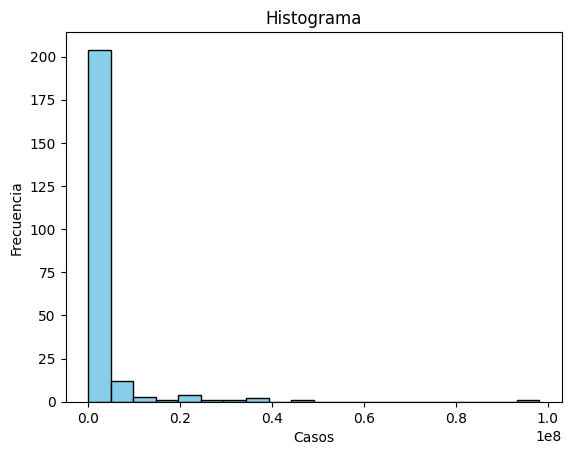

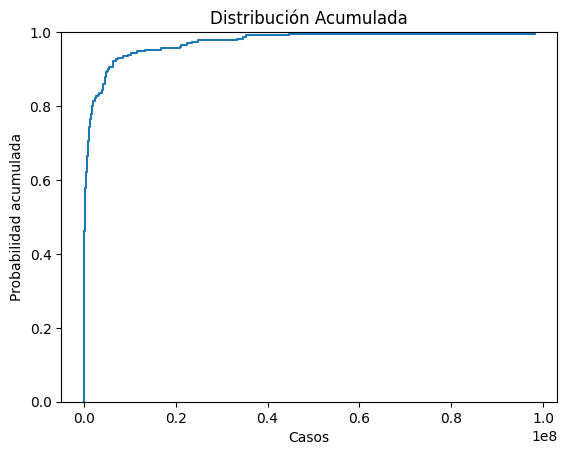

<Figure size 640x480 with 0 Axes>

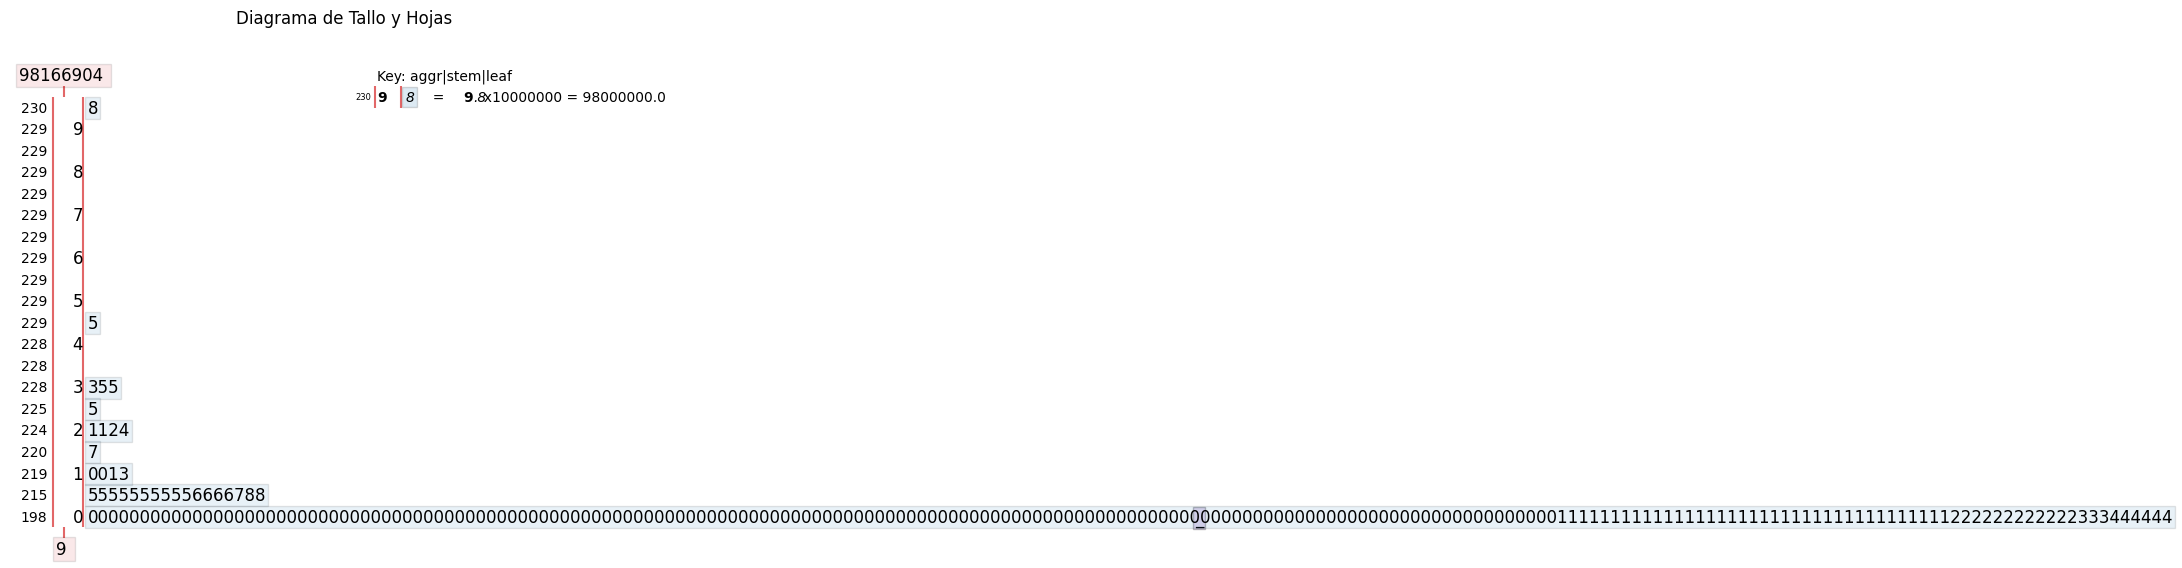

9. Tabulaciones Cruzadas:
col_0              count
pais                    
Afghanistan            1
Albania                1
Algeria                1
Andorra                1
Angola                 1
...                  ...
Wallis and Futuna      1
Western Sahara         1
Yemen                  1
Zambia                 1
Zimbabwe               1

[230 rows x 1 columns]


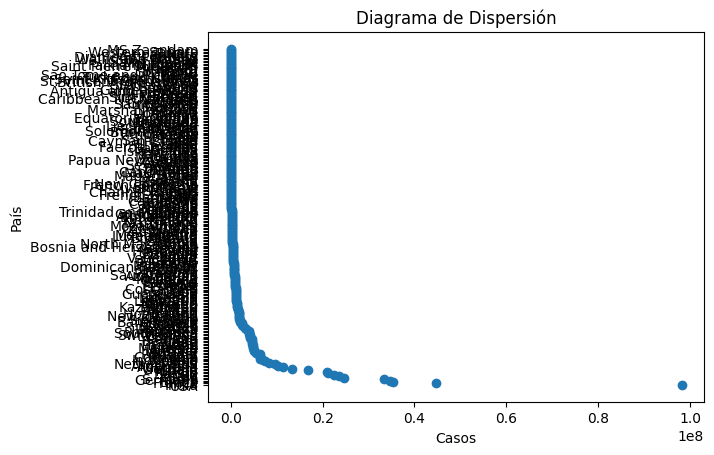

12. Medidas de Localización:
Media: 2705968.9260869566
Mediana: 203711.0
Moda: 9
Percentiles:
0.25      23649.0
0.50     203711.0
0.75    1256286.0
Name: casos, dtype: float64
Cuartiles:
25%      23649.0
50%     203711.0
75%    1256286.0
Name: casos, dtype: float64
13. Medidas de Variabilidad:
Rango: 98166895
Rango intercuartílico: 1232637.0
Varianza: 77086628581804.03
Desviación Estándar: 8779899.12139109
Coeficiente de Variación: 324.46415170360115
14. Medidas de la forma de la distribución, de la posición relativa y de la detección de observaciones atípicas:
Asimetría: 7.049187119975137
Curtosis: 64.90172251204207
Percentiles:
0.25      23649.0
0.50     203711.0
0.75    1256286.0
Name: casos, dtype: float64
Observaciones atípicas:
      pais     casos
0      USA  98166904
1    India  44587307
2   France  35342950
3   Brazil  34706757
4  Germany  33312373
15. Análisis exploratorio de datos: Resumen de 5 números:
min           9.0
25%       23649.0
50%      203711.0
75%     1256286.0


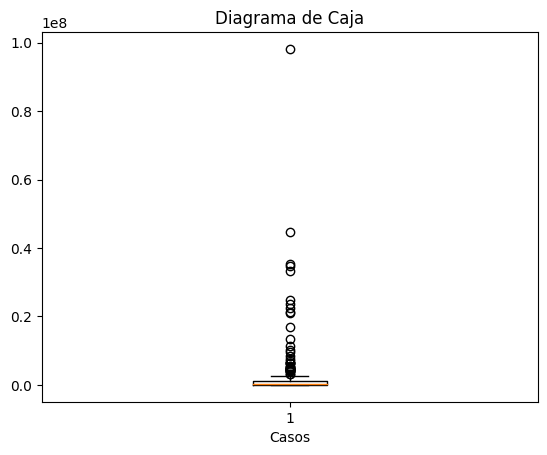

16. Medidas de la Asociación entre dos Variables:
Covarianza: 77086628581804.02
Coeficiente de Correlación: 1.0
17. Análisis exploratorio de datos: Resumen de 5 números:
min           9.0
25%       23649.0
50%      203711.0
75%     1256286.0
max    98166904.0
Name: casos, dtype: float64


<ipython-input-13-a54469dafad0>:126: FutureWarning:

The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-13-a54469dafad0>:127: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



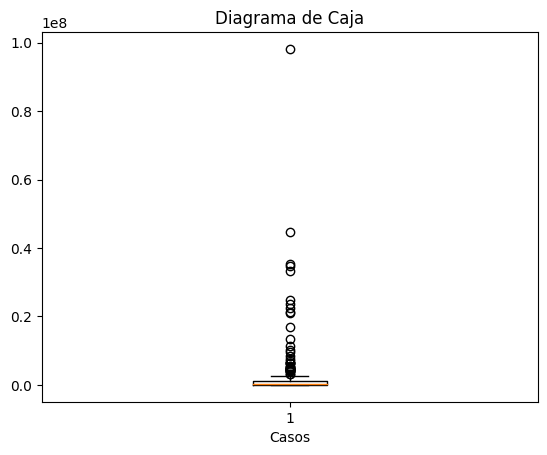

18. Medidas de la Asociación entre dos Variables:
Covarianza: 77086628581804.02
Coeficiente de Correlación: 1.0


<ipython-input-13-a54469dafad0>:144: FutureWarning:

The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-13-a54469dafad0>:145: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import stemgraphic

# Cargar el CSV desde Google Colab
from google.colab import files
uploaded = files.upload()

# Imprimir las claves disponibles
print("Claves disponibles:", uploaded.keys())

# Obtener el nombre del archivo (clave)
file_name = list(uploaded.keys())[0]  # Obtener el primer (y único) elemento de las claves
print("Nombre del archivo:", file_name)

# Leer el CSV
# Decodificar los bytes a una cadena antes de usar io.StringIO
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Asegurarse de que la columna 'casos' esté en formato numérico (eliminar comas)
df['casos'] = df['casos'].str.replace(',', '').astype(int)

# 5. Gráfica de puntos
plt.scatter(df['casos'], df['pais'])
plt.xlabel('Casos')
plt.ylabel('País')
plt.title('Gráfica de Puntos')
plt.show()

# 6. Histograma
plt.hist(df['casos'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Casos')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()

# 7. Distribuciones acumuladas
sns.ecdfplot(df['casos'])
plt.xlabel('Casos')
plt.ylabel('Probabilidad acumulada')
plt.title('Distribución Acumulada')
plt.show()

# 8. Análisis exploratorio de datos: el diagrama de tallo y hojas
plt.figure()
stemgraphic.stem_graphic(df['casos'])
plt.xlabel('Casos')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Tallo y Hojas')
plt.show()


# 9. Tabulaciones cruzadas
tabulacion_cruzada = pd.crosstab(df['pais'], columns='count')
print("9. Tabulaciones Cruzadas:")
print(tabulacion_cruzada)

# 10. Diagrama de dispersión y línea de tendencia
plt.scatter(df['casos'], df['pais'])
plt.xlabel('Casos')
plt.ylabel('País')
plt.title('Diagrama de Dispersión')
plt.show()



# 12. Medidas de localización: Media, Mediana, Moda, Percentiles, Cuartiles
media = df['casos'].mean()
mediana = df['casos'].median()
moda = df['casos'].mode().iloc[0]  # Puede haber múltiples modas, tomamos la primera
percentiles = df['casos'].quantile([0.25, 0.5, 0.75])
cuartiles = df['casos'].describe(percentiles=[0.25, 0.5, 0.75]).loc[['25%', '50%', '75%']]

print("12. Medidas de Localización:")
print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Percentiles:")
print(percentiles)
print("Cuartiles:")
print(cuartiles)

# 13. Medidas de variabilidad: Rango, Rango intercuartílico, Varianza, Desviación estándar, Coeficiente de variación
rango = df['casos'].max() - df['casos'].min()
rango_intercuartilico = cuartiles.loc['75%'] - cuartiles.loc['25%']
varianza = df['casos'].var()
desviacion_estandar = df['casos'].std()
coeficiente_variacion = (desviacion_estandar / media) * 100

print("13. Medidas de Variabilidad:")
print("Rango:", rango)
print("Rango intercuartílico:", rango_intercuartilico)
print("Varianza:", varianza)
print("Desviación Estándar:", desviacion_estandar)
print("Coeficiente de Variación:", coeficiente_variacion)

# 14. Medidas de la forma de la distribución, de la posición relativa y de la detección de observaciones atípicas
asimetria = df['casos'].skew()
curtosis = df['casos'].kurtosis()
percentiles = df['casos'].quantile([0.25, 0.5, 0.75])
z_scores = (df['casos'] - df['casos'].mean()) / df['casos'].std()
outliers = df[abs(z_scores) > 3]

print("14. Medidas de la forma de la distribución, de la posición relativa y de la detección de observaciones atípicas:")
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)
print("Percentiles:")
print(percentiles)
print("Observaciones atípicas:")
print(outliers)

# 15. Análisis exploratorio de datos: Resumen de 5 números, Diagrama de caja
resumen_5_numeros = df['casos'].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print("15. Análisis exploratorio de datos: Resumen de 5 números:")
print(resumen_5_numeros)

plt.boxplot(df['casos'])
plt.xlabel('Casos')
plt.title('Diagrama de Caja')
plt.show()

# 16. Medidas de la asociación entre dos variables: Covarianza, Coeficiente de correlación
covarianza = df.cov().loc['casos', 'casos']
correlacion = df.corr().loc['casos', 'casos']

print("16. Medidas de la Asociación entre dos Variables:")
print("Covarianza:", covarianza)
print("Coeficiente de Correlación:", correlacion)

# 17. Análisis exploratorio de datos: Resumen de 5 números, Diagrama de caja
resumen_5_numeros = df['casos'].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print("17. Análisis exploratorio de datos: Resumen de 5 números:")
print(resumen_5_numeros)

plt.boxplot(df['casos'])
plt.xlabel('Casos')
plt.title('Diagrama de Caja')
plt.show()

# 18. Medidas de la asociación entre dos variables: Covarianza, Coeficiente de correlación
covarianza = df.cov().loc['casos', 'casos']
correlacion = df.corr().loc['casos', 'casos']

print("18. Medidas de la Asociación entre dos Variables:")
print("Covarianza:", covarianza)
print("Coeficiente de Correlación:", correlacion)


In [ ]:
!pip install stemgraphic


In [ ]:
!pip install stemgraphic



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 820.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=6b8d2fd753e69e8dedc68450a14cd50e80879107b7cb7b354790ca13c559f257
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
!pip install seaborn
!pip install matplotlib


In [ ]:
from itertools import zip_longest


In [ ]:
# 11. Paradoja de Simpson
# Crear un DataFrame con datos adicionales para ilustrar la Paradoja de Simpson
additional_data = {'pais': ['Group A'] * 50 + ['Group B'] * 50,
                   'casos': [50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
                             55, 55, 55, 55, 55, 55, 55, 55, 55, 55,
                             60, 60, 60, 60, 60, 60, 60, 60, 60, 60,
                             65, 65, 65, 65, 65, 65, 65, 65, 65, 65,
                             70, 70, 70, 70, 70, 70, 70, 70, 70, 70][:50]}  # Ajusta la longitud aquí

# Asegurarse de que ambas listas tengan la misma longitud usando zip_longest
additional_data = {'pais': list(zip_longest(additional_data['pais'], [None]*50))[0],
                   'casos': list(zip_longest(additional_data['casos'], [None]*50))[0]}

additional_df = pd.DataFrame(additional_data)

# Eliminar filas con valores None
additional_df = additional_df.dropna()

# Concatenar el DataFrame original y el adicional
df_concatenated = pd.concat([df, additional_df])

# Calcular la media de casos para cada grupo simulado
mean_casos_by_group = df_concatenated.groupby('pais')['casos'].mean()

# Imprimir la Paradoja de Simpson simulada
print("11. Paradoja de Simpson:")
print("Media de casos para el Grupo A simulado:", mean_casos_by_group['USA'])
print("Media de casos para el Grupo B simulado:", mean_casos_by_group['India'])
print("Media general simulada:", df_concatenated['casos'].mean())


11. Paradoja de Simpson:
Media de casos para el Grupo A simulado: 98166904.0
Media de casos para el Grupo B simulado: 44587307.0
Media general simulada: 2694254.9913419914
